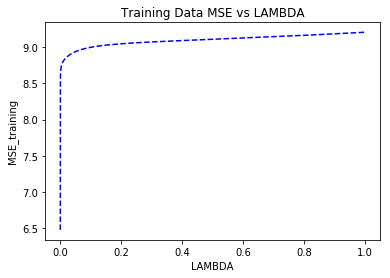

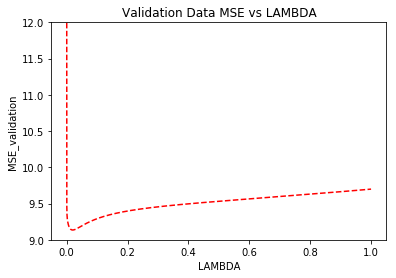

The Minimal MSE of the Validation Set is:  9.13508347301
The LAMBDA that gives the Minimal MSE of the Validation Set is:  0.0197


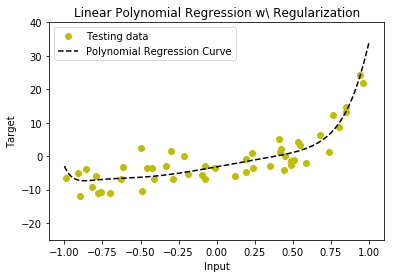

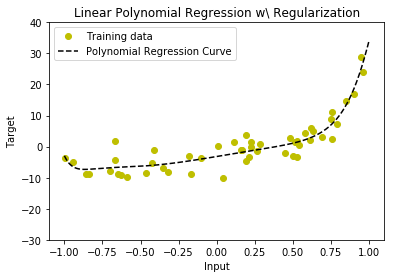

w_star [-3.18973086  8.19137278  0.60379764 -5.5436558   5.82058328  7.17328271
  3.35478214  7.56136376  1.81569981  4.93826086  1.7264199   2.19816051
  1.99429045  0.04660261  1.96770879 -1.40682109  1.46390254 -2.23433785
  0.53322291 -2.56100532 -0.69836476]


In [10]:
#A1_1.1
import matplotlib.pyplot as plt
import numpy as np

#training data
data = np.genfromtxt( "Datasets\Dataset_1_train.csv",names=['x','y'], delimiter=",")
x1=data['x']
y=data['y']

#validation data
data_val = np.genfromtxt( "Datasets\Dataset_1_valid.csv",names=['x_val','y_val'], delimiter=",")  
x1_val=data_val['x_val']
y_val=data_val['y_val'] 

#testing data
data_tst = np.genfromtxt( "Datasets\Dataset_1_test.csv",names=['x_tst','y_tst'], delimiter=",")  
x1_tst=data_tst['x_tst']
y_tst=data_tst['y_tst'] 

#create matrixe with polynomial fct as cols and # of examples as rows
def crt_poly_mat(x1,high_exp):
    x0=np.ones(50)
    x=np.column_stack((x0,x1))
    for i in range(2,high_exp+1):
        x_temp=x1**i
        x=np.column_stack((x,x_temp))
    return x

#create the poly matrices        
x_val=crt_poly_mat(x1_val,20)      
x=crt_poly_mat(x1,20)


xtx=x.T.dot(x) 
xty=x.T.dot(y)

#compute the MSE of a prediction on a given dataset
def MSE(x,y,w):
    return (y-x.dot(w)).T.dot((y-x.dot(w)))/x.shape[0]

arr=[]
arr_val=[]
inc_arr=[]

#loop for different values of lambas from 0.00 to 1 with jumps of 0.01
for LAMBDA_H in range(0,10000):
    LAMBDA=LAMBDA_H/10000.0
    
    xtx_plus_LAMBDA_inv=np.linalg.inv(xtx+(LAMBDA*np.eye(21)))
    w_star=xtx_plus_LAMBDA_inv.dot(xty)
    #training MSE                                  
    MSE_tr=MSE(x,y,w_star)
    #validation MSE
    MSE_val=MSE(x_val,y_val,w_star)
    arr.append(MSE_tr)
    arr_val.append(MSE_val)
    #arr containing the value of my LAMBDA
    inc_arr.append(LAMBDA)
     
MSE_arr_tr=np.array(arr)
MSE_arr_val=np.array(arr_val)
LAMBDA_arr=np.array(inc_arr)

#this makes the predicction of Y given using a 20 degrees polynomial model
def y_pred(t,w_star):
    return w_star[0]*t**0+w_star[1]*t**1+w_star[2]*t**2+w_star[3]*t**3+w_star[4]*t**4+w_star[5]*t**5+w_star[6]*t**6+w_star[7]*t**7+w_star[8]*t**8+w_star[9]*t**9+w_star[10]*t**10+w_star[11]*t**11+w_star[12]*t**12+w_star[13]*t**13+w_star[14]*t**14+w_star[15]*t**15+w_star[16]*t**16+w_star[17]*t**17+w_star[18]*t**18+w_star[19]*t**19+w_star[20]*t**20

t1 = np.arange(-1, 1, 0.00001)

#plot everything
plt.plot(LAMBDA_arr,MSE_arr_tr, 'b--')
plt.title('Training Data MSE vs LAMBDA')
plt.ylabel('MSE_training')
plt.xlabel('LAMBDA')
#plt.savefig('plots/plot1.2a.png')
plt.show()
plt.plot(LAMBDA_arr,MSE_arr_val, 'r--')
plt.ylim(9,12)
plt.title('Validation Data MSE vs LAMBDA')
plt.ylabel('MSE_validation')
plt.xlabel('LAMBDA')
#plt.savefig('plots/plot1.2b.png')
plt.show()

#find the LAMBDA that gives the lowest error in the validation set
LAMBDA_star=LAMBDA_arr[np.argmin(MSE_arr_val)]
print "The Minimal MSE of the Validation Set is: ",MSE_arr_val[np.argmin(MSE_arr_val)]
print "The LAMBDA that gives the Minimal MSE of the Validation Set is: ",LAMBDA_star

#TESTING
xtx_plus_LAMBDA_inv=np.linalg.inv(xtx+(LAMBDA_star*np.eye(21)))
w_star=xtx_plus_LAMBDA_inv.dot(xty)


plt.plot(x1_tst,y_tst, 'yo', t1, y_pred(t1,w_star), '--k')
plt.ylim(-25,40)
plt.ylabel('Target')
plt.xlabel('Input')
plt.title('Linear Polynomial Regression w\ Regularization')
plt.legend(['Testing data','Polynomial Regression Curve'])
#plt.savefig('plots/plot1.2d.png')
plt.show()

plt.plot(x1,y, 'yo', t1, y_pred(t1,w_star), '--k')
plt.ylim(-30,40)
plt.ylabel('Target')
plt.xlabel('Input')
plt.title('Linear Polynomial Regression w\ Regularization')
plt.legend(['Training data','Polynomial Regression Curve'])
#plt.savefig('plots/plot1.2d.png')
plt.show()

np.set_printoptions(threshold='nan')
print "w_star", w_star


In [11]:
print "MSE of the testing dataset is : ", MSE(crt_poly_mat(x1_tst,20),y_tst,w_star)

MSE of the testing dataset is :  10.7323010053


In [12]:
print "MSE of the training dataset is : ", MSE(crt_poly_mat(x1,20),y,w_star)

MSE of the training dataset is :  8.85645680048
